In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
import seaborn as sns

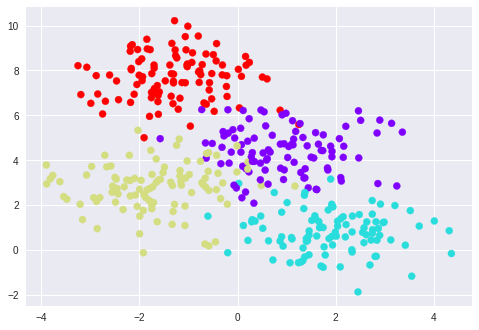

In [15]:
#Start by making a random data wtih 400 samples segregated into 4 separate clusters
from sklearn.datasets import make_blobs as mb
#make_blobs is the dataset for making random blob values
x, y = mb(n_samples = 400, centers = 4, random_state = 0, cluster_std = 1.0)

plt.scatter(x[:, 0], x[:, 1], c = y, s = 50 , cmap = 'rainbow')
plt.show()

In [18]:
#Finding the overfitting estimation values in the dataset

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() #Always import the method function as a separate variable

plt.figure()
visuza

TypeError: __init__() got an unexpected keyword argument 'fig_size'